 ![](fig/python-logo.png)

### Master 2 DUAS Unistra,  2017-2018

***

# Programmer en Python
***

## Une introduction à Numpy

***

Matthieu Boileau - [matthieu.boileau@math.unistra.fr](mailto: matthieu.boileau@math.unistra.fr)


*Contenu sous licence [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0), fortement inspiré de <https://github.com/pnavaro/python-notebooks>*

# Numpy

Le Python pur est peu performant pour le calcul. Les listes ne sont pas des objets efficaces pour représenter les tableaux numériques de grande taille. [Numpy](http://www.numpy.org/) a été créé à l'initiative de développeurs qui souhaitaient combiner la souplesse du langage python et des outils de calcul algébrique performants.

Numpy se base sur :

- le `ndarrays` : tableau multidimensionnel
- des objets dérivés comme les *masked arrays* et les matrices
- le `ufunc` : opérations mathématiques optimisées pour les tableaux
- des méthodes pour réaliser des opération rapides sur les tableaux :
    - manipulation des *shapes*
    - tri
    - entrées/sorties
    - FFT
    - algébre linéaire
    - statistiques
    - calcul aléatoire
    - et bien plus !
  
Numpy permet de calculer *à la Matlab* en Python. Il est un élément de base de l'écosystème [SciPy](https://www.scipy.org/)

## Démarrer avec Numpy


In [163]:
import numpy as np
print(np.__version__)

1.13.3


Utilisez l'auto-complétion pour lister les objets numpy :

In [164]:
#np.nd<TAB>

La rubrique d'aide est également précieuse

In [165]:
?np.ndarray

# Tableaux Numpy : performance

- Les listes Python sont trop lentes pour le calcul et utilisent beaucoup de mémoire
- Représenter des tableaux multidimensionnels avec des listes de listes devient vite brouillon à programmer

In [166]:
from random import random
from operator import truediv

In [352]:
l1 = [random() for i in range(1000)]
l2 = [random() for i in range(1000)]
%timeit s = sum(map(truediv, l1, l2))

66.9 µs ± 2.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [168]:
a1 = np.array(l1)
a2 = np.array(l2)
%timeit s = np.sum(a1/a2)

9.12 µs ± 1.65 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Tableaux Numpy : différence avec les listes

Les différences entre tableaux Numpy et listes Python :
- un `ndarray` a une taille fixée à la création
- un `ndarray` est composé d'éléments du même type
- les opérations sur les tableaux sont réalisées par des routines C pré-compilées et optimisées (éventuellement parallèles)

In [169]:
a = np.array([0, 1, 2, 3])  #  list
b = np.array((4, 5, 6, 7))  #  tuple
c = np.matrix('8 9 0 1') #  string (syntaxe matlab)

In [170]:
print(a, b, c)

[0 1 2 3] [4 5 6 7] [[8 9 0 1]]


# Tableaux Numpy : propriétés

In [171]:
a = np.array([1, 2, 3, 4, 5])  # On crée un tableau

In [172]:
type(a)  # On vérifie son type

numpy.ndarray

In [173]:
a.dtype  # On affiche le type de ses éléments

dtype('int64')

In [174]:
a.itemsize  # On affiche la taille mémoire (en octets) de chaque élément

8

In [175]:
a.shape  # On retourne un tuple indiquant la longueur de chaque dimension

(5,)

In [176]:
a.size  #  On retourne le nombre total d'éléments

5

In [177]:
a.ndim   # On retourne le nombre de dimensions

1

In [178]:
a.nbytes  # On retourne l'occupation mémoire

40

> - Toujours utiliser `shape` ou `size` pour les tableaux numpy plutôt que `len`
> - `len` est réservé aux tableaux 1D

# Création de tableaux Numpy

## Avec des valeur constantes

In [179]:
x = np.zeros((5, 3))  # On ne précise pas le type : on crée des flottants
print(x)
print(x.dtype)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
float64


In [180]:
x = np.zeros((5, 3), dtype=int)  # On explicite le type
x

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

On dispose d'une panoplie de fonctions pour allouer des tableaux avec des valeurs constantes ou non initialisées (`empty`) :

`empty, empty_like, ones, ones_like, zeros, zeros_like, full, full_like`

## Création à partir d'une séquence


### `arange`

C'est l'équivalent de `range` pour les listes.

In [181]:
np.arange(5)  # entiers de 0 à 4

array([0, 1, 2, 3, 4])

In [182]:
np.arange(5, dtype=np.double)  # flottants de 0. à 4.

array([ 0.,  1.,  2.,  3.,  4.])

In [183]:
np.arange(2, 7)  # entiers de 2 à 6.

array([2, 3, 4, 5, 6])

In [184]:
np.arange(2, 7, 0.5)  # flottants avec incrément de 0.5.

array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5])

### `linspace` et `logspace`

In [185]:
np.linspace(1, 4, 5) # 5 éléments régulièrement espacés entre 1 et 4, 1 et 4 inclus

array([ 1.  ,  1.75,  2.5 ,  3.25,  4.  ])

In [186]:
np.logspace(1, 4, 5)  # 5 éléments régulièrement espacés selon une progression géométrique entre 10^1 et 10^4

array([    10.        ,     56.23413252,    316.22776602,   1778.27941004,
        10000.        ])

Consulter l'aide contextuelle pour plus de fonctionnalités

In [187]:
?np.logspace()

## Exercice : créer les tableaux suivants

```python
[100 101 102 103 104 105 106 107 108 109]
```
> Astuce: np.arange

In [188]:
# Votre code ici

```python
[-2. -1.8 -1.6 -1.4 -1.2 -1. -0.8 -0.6 -0.4 -0.2 0. 
0.2 0.4 0.6 0.8 1. 1.2 1.4 1.6 1.8]
```

> Astuce: np.linspace

In [326]:
# Votre code ici

```python
[ 0.001	0.00129155 0.0016681 0.00215443 0.00278256 
     0.003593810.00464159 0.00599484 0.00774264 0.01]
```

> Astuce: np.logspace

In [327]:
# Votre code ici

```python
[[ 0. 0. -1. -1. -1.] 
 [ 0. 0.  0. -1. -1.] 
 [ 0. 0.  0.  0. -1.]
 [ 0. 0.  0.  0.  0.]
 [ 0. 0.  0.  0.  0.] 
 [ 0. 0.  0.  0.  0.] 
 [ 0. 0.  0.  0.  0.]]
```

> Astuce : np.tri, np.ones

In [210]:
# Votre code ici
?np.tri()

<button data-toggle="collapse" data-target="#numpy1" class='btn btn-primary'>Solution</button>

<div id="numpy1" class="collapse">
```python
np.arange(100, 110)
np.linspace(-2, 2, 20, endpoint=False)
np.logspace(-3, -2, 10)
np.tri(7, 5, k=1) - np.ones((7, 5))
```

## Création de tableaux à partir de fichiers

Afin d'illustrer la création d'un tableau numpy à partir de données lues dans un fichier texte, on commence par sauvegarder un tableau dans un fichier.

In [192]:
x = np.arange(0.0, 5.0, 1.0)
y = x*10.
z = x*100.

In [193]:
np.savetxt('test.out', (x, y, z))
%cat test.out

0.000000000000000000e+00 1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00 4.000000000000000000e+00
0.000000000000000000e+00 1.000000000000000000e+01 2.000000000000000000e+01 3.000000000000000000e+01 4.000000000000000000e+01
0.000000000000000000e+00 1.000000000000000000e+02 2.000000000000000000e+02 3.000000000000000000e+02 4.000000000000000000e+02


In [194]:
np.savetxt('test.out', (x, y, z), fmt='%1.4e')   # Notation exponentielle
%cat test.out

0.0000e+00 1.0000e+00 2.0000e+00 3.0000e+00 4.0000e+00
0.0000e+00 1.0000e+01 2.0000e+01 3.0000e+01 4.0000e+01
0.0000e+00 1.0000e+02 2.0000e+02 3.0000e+02 4.0000e+02


In [195]:
np.loadtxt('test.out')

array([[   0.,    1.,    2.,    3.,    4.],
       [   0.,   10.,   20.,   30.,   40.],
       [   0.,  100.,  200.,  300.,  400.]])

`savetxt` et `loadtxt` ont leurs correspondants binaires :

- [save](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.save.html#numpy.save) : enregistrer un tableau dans un fichier binaire au format `.npy`
- [load](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.load.html#numpy.load): créer un tableau numpy à partir d'un fichier binaire numpy

## H5py

Le format `.npy` n'est lisible que par Numpy. 
À l'inverse, le format HDF5 est partagé par un grand nombre d'applications.
De plus, il permet de structurer des données binaires :
- en les nommants
- en ajoutant des métadonnées
- en assurant une portabilité indépendante de la plateforme

> voir le [manuel utilisateur](http://docs.h5py.org)

H5py est une interface Python pour HDF5.

On écrit dans le fichier `test.h5`

In [196]:
import h5py as h5

with h5.File('test.h5', 'w') as f:
    f['x'] = x
    f['y'] = y
    f['z'] = z

On lit le fichier `test.h5` (qui pourrait provenir d'une autre application)

In [197]:
with h5.File('test.h5', 'r') as f:
    for field in f.keys():
        print(f"{field}: {f[field].value}")

x: [ 0.  1.  2.  3.  4.]
y: [  0.  10.  20.  30.  40.]
z: [   0.  100.  200.  300.  400.]


## Opérations basiques sur les tableaux

Par défaut, Numpy réalise les opérations arithmétiques éléments par éléments

In [221]:
a = np.array([0, 1, 2, 3])
b = np.array((4, 5, 6, 7))

print(a*b)  # Produit éléments par éléments : pas le produit matriciel !
print(a + b)

[ 0  5 12 21]
[ 4  6  8 10]


In [222]:
print(a**2)

[0 1 4 9]


In [223]:
print(5*a)
print(5 + a)

[ 0  5 10 15]
[5 6 7 8]


In [219]:
print(a < 2)

[ True  True False False]


In [207]:
print(np.cos(a*np.pi))  # Utilisation de ufunc

[ 1. -1.  1. -1.]


De nombreuses ufunc dans la [doc officielle](https://docs.scipy.org/doc/numpy/user/quickstart.html#universal-functions).

#  Indexation et slicing

## Indexation

Les règles différent légèrement des listes pour les tableaux multi-dimensionnels

In [349]:
# Indexation d'un tableau numpy
a = np.arange(9).reshape(3, 3)  # Notez l'effet de la méthode reshape()
print(a)
print(a[1, 1])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
4


In [350]:
# Indexation de la liste équivalente
liste = a.tolist()
print(liste)
print(liste[1][1])

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]
4


## Slicing

Pour les tableaux unidimensionnels, les règles de slicing sont les mêmes que pour les listes.
Pour les tableaux multidimensionnels numpy, le slicing permet d'extraire des séquences dans n'importe quelle direction.

In [279]:
print(a)
print(a[2, :])  # Retourne la 3ème ligne
print(a[:, 1])  # Retourne la deuxième colonne

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[6 7 8]
[1 4 7]


**Attention :** contrairement aux listes, le slicing de tableaux ne renvoie pas une copie mais constitue une ***vue*** du tableau.

In [337]:
b = a[:, 1]
b[0] = 100
print(a)
print(b.base is a)  # ici .base retourne le tableau dont b est la vue

[[   1.  100.]
 [   3.    4.]]
True


Si on veut réaliser une copie d'un tableau, il faut utiliser la fonction `copy()`

In [353]:
b = a[:, 1].copy()
print(b.base)  # ici b n'est pas une vue mais une copie donc b.base retourne None
b[0] = 200
print(a)

None
[[0 1 2]
 [3 4 5]
 [6 7 8]]


## Exercice

Calculer la dérivée de $f(x) = \sin(x)$ par la méthode des différences finies :

$$\frac{\partial f}{\partial x} \approx \frac{f(x+\Delta x)-f(x)}{\Delta x}$$

Les valeurs seront calculées au milieu de deux abscisses discrètes successives.

In [298]:
x, dx = np.linspace(0., 4.*np.pi, 40, retstep=True)  # On crée un tableau de 40 points d'abscisse
y = np.sin(x)

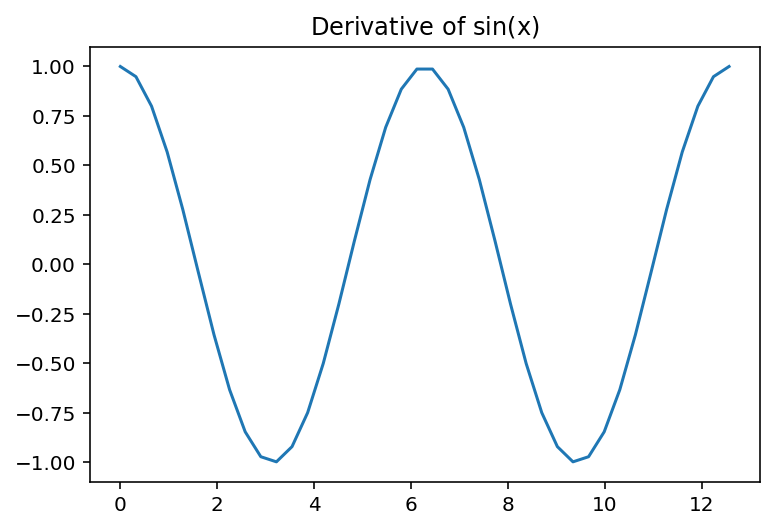

In [300]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Pour augmenter la résolution
import matplotlib.pyplot as plt
plt.plot(x, np.cos(x))  # la dérivée analytique de sin() est cos()

# Votre code ici

#plt.plot(x_mil, dy_dx, 'rx')  # x_mil est le milieu de deux abscisses
plt.title(r"$\rm{Derivative\ of}\ \sin(x)$");

<button data-toggle="collapse" data-target="#sinderivative" class='btn btn-primary'>Solution</button>
<div id="sinderivative" class="collapse">
```python
dy = y[1:] - y[:-1]
dx = x[1:] - x[:-1]
dy_dx = dy/dx

x_mil = 0.5*(x[1:] + x[:-1]) 
```

# Quelques éléments d'algèbre linéaire

In [230]:
A = np.array([[1, 1],
              [0, 1]])
B = np.array([[2, 0],
              [3, 4]])
print(A*B)           # produit élément par élément
print(A.dot(B))      # produit matriciel
print(np.dot(A, B))  # un autre produit matriciel
print((A@B))         # Encore un autre produit matriciel

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


In [341]:
a = np.array([[1.0, 2.0],
              [3.0, 4.0]])
print(a)

[[ 1.  2.]
 [ 3.  4.]]


In [342]:
# Deux syntaxes équivalentes pour la transposition
print(a.transpose())
print(a.T)

[[ 1.  3.]
 [ 2.  4.]]
[[ 1.  3.]
 [ 2.  4.]]


In [343]:
print(np.linalg.inv(a))

[[-2.   1. ]
 [ 1.5 -0.5]]


In [344]:
print(np.trace(a))  # trace

5.0


In [345]:
print(np.eye(2))     # unit 2x2 matrix; "eye" represents "I"

[[ 1.  0.]
 [ 0.  1.]]


In [346]:
y = np.array([[5.], [7.]])
print(np.linalg.solve(a, y))

[[-3.]
 [ 4.]]


In [347]:
j = np.array([[0.0, -1.0], [1.0, 0.0]])
print(np.dot (j, j))     # produit matriciel
print(np.linalg.eig(j))  # Extraction des valeurs propres

[[-1.  0.]
 [ 0. -1.]]
(array([ 0.+1.j,  0.-1.j]), array([[ 0.70710678+0.j        ,  0.70710678-0.j        ],
       [ 0.00000000-0.70710678j,  0.00000000+0.70710678j]]))


# Les méthodes associées aux tableaux

Elles sont très nombreuses : impossible de toutes les lister dans le cadre de ce cours.
Citons brièvement :

- `min`, `max`, `sum`
- `sort`, `argmin`, `argmax`
- statistiques basiques : `cov`, `mean`, `std`, `var`

À chercher dans la [doc officielle](https://docs.scipy.org/doc/numpy/user/quickstart.html#)

# Programmation avec Numpy

- Les opérations sur les tableaux sont rapides, les boucles python sont lentes => **Eviter les boucles !**
- C'est une gymnastique qui nécessite de l'entraînement
- Le résultat peut devenir difficile à lire et à débugguer, par exemple dans le cas de boucles contenant de multiples conditions
- D'autres options sont alors envisageables (Cython, Pythran, etc.)

# Références
- [NumPy reference](http://docs.scipy.org/doc/numpy/reference/)
- [Numpy by Konrad Hinsen](http://calcul.math.cnrs.fr/Documents/Ecoles/2013/python/NumPy%20avance.pdf)
- [Cours de Pierre Navaro](https://github.com/pnavaro/python-notebooks)